## Previously on Data Science from Scratch

### Matrix multiplication

See https://en.wikipedia.org/wiki/Matrix_multiplication#Examples_of_matrix_products for more details.  

Matrix multiplication between a matrix $X$ and a column vector $\beta$.

If $$X = \begin{pmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3}
\end{pmatrix} \text{ and } \beta = \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}$$, then 


$$X\beta = \begin{pmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3}
\end{pmatrix} \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix} =\begin{pmatrix}
x_{1,1}b_1 + x_{1,2}b_2 + x_{1,3}b_3 \\
x_{2,1}b_1 + x_{2,2}b_2 + x_{2,3}b_3 \\
x_{3,1}b_1 + x_{3,2}b_2 + x_{3,3}b_3
\end{pmatrix}$$

This implemented in NumPy using `np.dot`, `np.matmul` or the `@` operator.

### Linear Regression

Fitting a linear regression is a fairly simply procedure, but can be prove difficult if there are a significant number of observations, or if there are more features than observations.  

We hypothesize that our target variable $y$ can be written as a linear combination of features $X_1, X_2, \ldots, X_n$, i.e., 

$$y = a + b_1X_1 + b_2X_2 + \cdots + b_nX_n + \epsilon$$

Above, $\epsilon$ is the error.  We can write this succinctly in matrix form as 

$$y = X\beta + \epsilon$$

### Gradient Descent

Gradient descent is a first order optimization method, that is, it only uses first derivatives to solve the optimization problem (i.e., find a local extremum).  

This method is so great because 

* you don't need to work about the hessian of the objective function (the matrix of partial derivatives).  Consider Newton Rhapson (another optimization routine) method which requires calculating the hessian and then inverting it.  If there are $p$ parameters to solve for, the Hessian will be $p \times p$.  This can be very expensive for large problems!! 
* it is very easy to implement
* it is embarrasingly parrallelizable
* its extension, Stochastic Gradient Descent is very popular in training neural nets.

Let's examine the algorithm using a simple 3-dimensional function. We'll need the function value and it's derivatives.

$$ z = x^3 + y^3 - 3x - 3y $$

$$\frac{dz}{dx} = 3x^2 - 3 $$

$$\frac{dz}{dy} = 3y^2 - 3 $$

This function is a proxy for the linear regression loss function and it's derivatives over the model parameters.

In [1]:
import numpy as np
import holoviews as hv
import matplotlib.pyplot as plt
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
class Function(object):
    def __init__(self, a=3, b=3):
        self.a = a
        self.b = b
    
    def value(self, x, y):
        return x**3 + y**3 - self.a*x - self.b*y
    
    def dx(self, x):
        return 3 * x**2 - self.a
    
    def dy(self, y):
        return 3 * y**2 - self.b

func = Function()

Starting from a random position in $x$ and $y$
1. Compute the gradient
1. Update the values of the positions in $x$ and $y$ by
    1. Multiplying the gradient by the *learning_rate*, also referred to as step size$^*$
    1. Subtract the above quantities from the current positions
    
    
$^*$ a large step size could skip right over the minimum.

In [3]:
def sgd(func, init=None, epochs=300, learning_rate=0.01, seed=133):
    
    # initialize the positions
    # to random numbers
    if init is None:
        np.random.seed(seed)
        current_x, current_y = np.random.uniform(low=-1.3, high=1.3, size=2)
    
    history = [(current_x, current_y)]
    for epoch in range(epochs):
        # compute the partial derivatives
        dx = func.dx(current_x)
        dy = func.dy(current_y)
        
        # The loss tells us how close to the
        # minimum we are at this step
        loss = np.sqrt((dx*dx + dy*dy))

        if epoch % 50 == 0:
            print(f'Epoch {epoch:3d}: loss {loss:.5f}')
        
        current_x -= learning_rate * dx
        current_y -= learning_rate * dy
        
        history.append((current_x, current_y))
        
    return np.stack(history, axis=0)

After 250 epochs the loss looks sufficiently low. The SGD algorithm needs the know the maximum number of epochs other wise it will just bounce around the minimum.

How many epochs you need depends on many factors. It is best to monitor the loss and judge when you think the loss is low enough or test the accuracy of your model with validation data.

In [4]:
parameter_history = sgd(func)

Epoch   0: loss 2.87692
Epoch  50: loss 2.43934
Epoch 100: loss 1.28066
Epoch 150: loss 0.07484
Epoch 200: loss 0.00343
Epoch 250: loss 0.00016


Let's plot the path followed by SGD.

:Overlay
   .Scatter3D.I :Scatter3D   [x,y,z]
   .Surface.I   :Surface   [x,y]   (z)
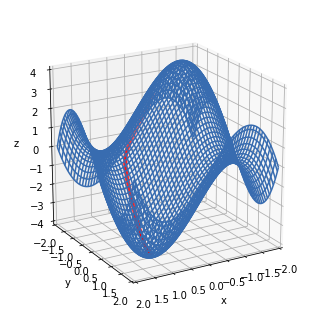

In [5]:
%%opts Scatter3D [elevation=20 azimuth=60 fig_inches=8]
%%opts Surface [elevation=20 azimuth=60] (cmap='fire')

# setup a 2D array of values
# of the function
x = np.linspace(-1.8, 1.8, 100)
y = x.copy()
X, Y = np.meshgrid(x,-y)
Z = func.value(X, Y)

func_plot = hv.Surface(Z, bounds=(-2,-2,2,2))

z = func.value(parameter_history[:,0], parameter_history[:,1])

hv.Scatter3D(np.c_[parameter_history, z]).options(c='red') \
  * func_plot.options(plot_type='wireframe', color=plt.cm.Accent.colors[4])

Here's our guess of the optimal values of $x$ and $y$.

In [6]:
parameter_history[-1]

array([0.99999997, 0.99999882])

## Ground Rules

<big><big><i>
    [Neural](https://ai.stackexchange.com/questions/5955/how-are-artificial-neural-networks-and-the-biological-neural-networks-similar-an)
    [Networks](https://analyticsindiamag.com/neural-networks-not-work-like-human-brains-lets-debunk-myth/)
    [do not](https://medium.com/swlh/artificial-neural-network-some-misconceptions-cb93e80b34bb)
    [mimic](https://www.omicsonline.org/open-access/are-neural-networks-imitations-of-mind-jcsb-1000179.php?aid=43854)
    [the brain or mind!](https://www.scientificamerican.com/article/experts-neural-networks-like-brain/)
    </i> They are <i>inspired</i> by biological neurons.</big></big></a>

* Real neurons do not arrive at an output by summing up the weighted inputs
* Real neurons do not stay on until the inputs change and the outputs may encode information using complex pulse arrangements.

<big><big><i>
    [ML and AI](https://www.psychologytoday.com/us/blog/the-future-brain/201801/the-unbearable-conundrum-ai-consciousness)
    [are not](https://futurism.com/conscious-ai-decades-away/)
    [artificial consciousness](https://techcrunch.com/2014/12/13/what-artificial-intelligence-is-not/)
</i></big></big>
* The real danger comes from [biased training data](https://www.wired.com/story/artificial-intelligence-seeks-an-ethical-conscience/)

<big><big><i>Let's not talk about [Google Duplex "beating" the Turing Test](https://towardsdatascience.com/did-google-duplex-beat-the-turing-test-yes-and-no-a2b87d1c9f58)</i></big></big>

## The classification problem

Let's make some artificial data we'll use to train our networks.

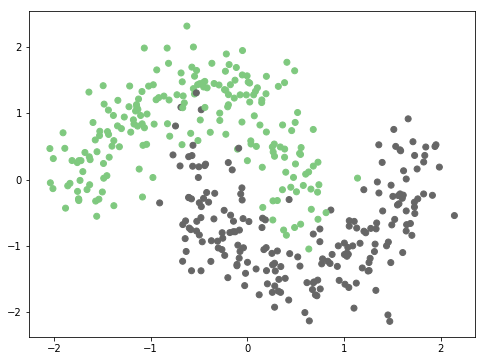

In [7]:
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale

X, y = make_moons(n_samples=400, noise=0.2, random_state=0)
X = scale(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent);

## Perceptron

A perceptron is the fundamental component of neural networks and is essentially a weighted linear transformation of the input data.

A perceptron is also referred to as a *one-unit layer* in an artificial neutral network.

<img src='img/perceptron.png'>

The term "transfer function" in the diagram is a less commonly used synonym for "activation function."

You've seen this before. It is the Logistic Regression where the *transfer function* is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function)

$$z = X\beta + \epsilon$$

$$y = \frac{1}{1 + e^{-z}} $$

In [8]:
def sigmoid(z):
    activated = 1 / (1 + np.exp(-z))
    return activated

Text(0.5,1,'Sigmoid')

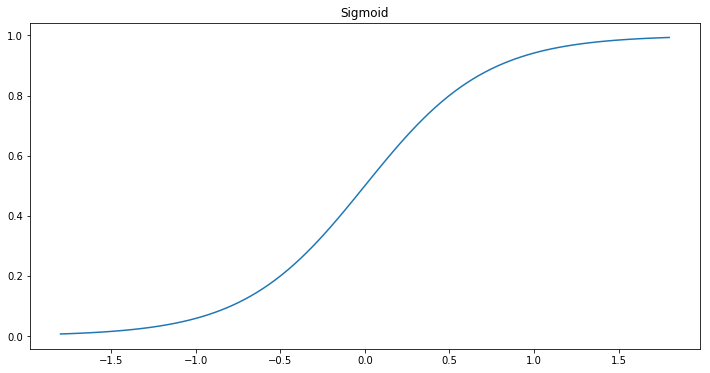

In [9]:
z = np.linspace(-5, 5, 100)
activated = sigmoid(z)

plt.figure(figsize=(12,6))
plt.plot(x,activated)
plt.title('Sigmoid')

Here we've implemented a single perceptron layer using the dot product.

In [10]:
class Layer(object):
    def __init__(self, weights, bias, activation):
        self.weights = weights
        self.bias = bias
        self.activation = activation
        
    def forward(self, X):
        output = X @ self.weights + self.bias
        activated = self.activation(output)
        return activated

Let's build a simple network.

In [11]:
class SimpleNetwork(object):
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
        self.layer = Layer(self.weights, self.bias, sigmoid)
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        probabilities = self.layer.forward(X)
        classes = (probabilities > 0.5).astype(int)
        return classes
    
    def score(self, X, y):
        y_predicted = self.predict(X)
        return (y == y_predicted).mean()

I've pre-trained weights, so let's just use them here. We'll learn how to train a model shortly.

In [12]:
# make random weights
weights = np.array([ 1.10747938, -2.3817345 ])
bias = np.array([-0.01101469])

demo_model = SimpleNetwork(weights, bias)
demo_model.score(X, y)

0.8775

But, Professor, that's just Logistic Regression!
=====================================

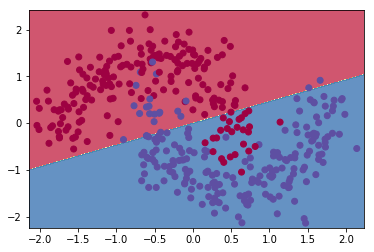

In [13]:
from plots import decision_boundary
decision_boundary(demo_model, X, y)

## Traditional Machine learning

One of the most time consuming steps in developing a traditional machine learning model is feature engineering. The data scientist has to *choose* reasonable features before training the model. 

For example:
* *n*-grams for language processing
* convolution filters for images or audio
* polynomial features
* feature reduction or expansion
* binning or scale transformations

Problems:
* Must be able to store data transformations
* Models like SVM$^*$ do not scale well with large numbers of columns
* How many features are enough? You'll need to use Grid Search methods.


$^*$ SVM does it's own polynomial expansion with the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method), but you'll still have to build other features like *n*-grams.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(3, include_bias=False)
X3 = poly3.fit(X)

In [15]:
poly3.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [16]:
poly_weights = np.array([-3.35501954, -1.81158073, -0.16567523,  0.17881471,  0.56676377,
        3.14445975, -0.43408943, -0.48135467, -1.22485521])

poly_bias = np.array([-0.29443299])

poly_model = SimpleNetwork(poly_weights, poly_bias)

In [17]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(poly3, poly_model)
pipe.score(X, y)

0.955

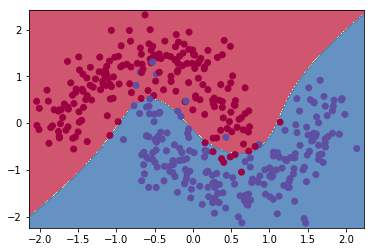

In [18]:
decision_boundary(pipe, X, y)

### Hidden layers make a network

A layer is a collection of individual *perceptrons*. The singe-layer model above could only train a linear decision boundary unless we prepare non-linear features.

In order to model more complex relationships between the inputs a *hidden layer* has been added with 5 perceptrons, each with their own weights. The weights are trained over the known `y` values.

This model is also referred to as a multi-layer perceptron. An infinitely large MLP has a lot of similarity with SVM models.

<img src='img/hidden.png' width='70%'>

<small><center>Image from [TensorFlow Playground](https://playground.tensorflow.org)</center></small>

By using the `'tanh'` activation in the hidden layer each perceptron gains some non-linearity. More on this topic later.

The last layer must have one output (0, 1) with activation `'sigmoid'` in order to predict between the two classes.

In [19]:
class MLPNetwork(object):
    def __init__(self, params1, params2):
        self.params1 = params1
        self.params2 = params2
        
        ## The single hidden layer
        weights1, bias1 = self.params1
        self.layer1 = Layer(weights1, bias1, np.tanh)
        
        ## The Logistic layer that computes probabilities
        weights2, bias2 = self.params2
        self.layer2 = Layer(weights2, bias2, sigmoid)
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        _output1 = self.layer1.forward(X)
        probabilities = self.layer2.forward(_output1).squeeze()
        classes = (probabilities > 0.5).astype(int)
        
        return classes
    
    def score(self, X, y):
        y_predicted = self.predict(X)
        return (y == y_predicted).mean()

In [20]:
hidden_weights = np.array([[ 2.28821949,  2.82240026,  0.8097191 ,  3.437555  , -1.66738027],
       [-0.81800636,  0.82412096, -1.11559084, -0.53013836,  0.62823968]])
hidden_bias = np.array([-2.50228549, -0.03638111,  0.60038654,  3.26376196,  1.86491857])

logistic_weights = np.array([[ 3.38388494],
       [-5.15962528],
       [ 1.6355525 ],
       [ 4.17595024],
       [-2.40053349]])
logistic_bias = np.array([0.18284765])

In [21]:
hidden_model = MLPNetwork((hidden_weights, hidden_bias), (logistic_weights, logistic_bias))
hidden_model.score(X, y)

0.9675

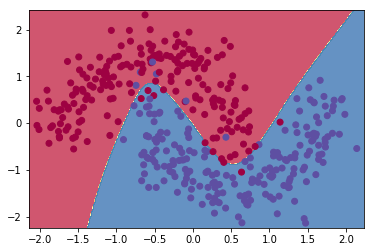

In [22]:
decision_boundary(hidden_model, X, y)

In [23]:
big_data = np.concatenate([X]*1000, axis=0)
big_data.nbytes / 1024

6250.0

In [24]:
%timeit pipe.predict(big_data)
%timeit hidden_model.predict(big_data)

51.3 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.3 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## The promise of Deep Learning

As you'll see in this introduction Deep Learning has developed into a tool that *discovers* feature engineering by training a network of artificial neurons, called perceptrons.

Many neural networks, such as *convolutional deep neural networks* and *recurrent neural networks* can effectively expose polynomial relations between features without requiring initial domain knowledge by developers. These can sucessively apply simple data transformations (layers) and fit weights at each layer during the training step.

>The optimal first representation layer in a three-layer model isn't the optimal first layer in a one-layer or two-layer model –François Chollet

Deep learning models are trained to learn the optimal weights of *all layers* jointly through global parameter optimization, referred to as feedback or *back-propagation*.

## Deep Learning

Before 2010 much of the application of neural networks were limited to a few layers, like the example above. These *shallow learning* networks were not much more powerful than SVM or Random Forests.

After the development of better activation functions, optimization algorithms, and GPU-based codes the term *Deep Learning* was applied to neural networks that contain 10 or more layers and millions of parameters.

The image below is an example of a *feed-forward* neural network.

Notice that data flows from left to right where each layer can act a *filter*. In the training step the *loss function* flows from right to left to compute the gradient at each layer. "+1" is the bias term.

<img src='img/3layers.png'>

https://legacy.gitbook.com/book/leonardoaraujosantos/artificial-inteligence/details

<img src='img/numbers.png'>

In [25]:
from IPython.display import IFrame

IFrame('https://playground.tensorflow.org', width=1000, height=800)